## Dimensionality Reduction in Python

### CHAPTER 1. Exploring High Dimensional Data

#### 1.1 Introduction

* Dimension of data -> number of columns in dataset
* Observations -> number of rows in dataset

In [1]:
# finding number of dimensions
import pandas as pd

pokemon_df = pd.read_csv('7_datasets/pokemon.csv')
print(pokemon_df.shape)
# print(pokemon_df.head())
# dimensions / number of columns is 13

(800, 13)


In [2]:
# removing featurese without variance
# find feature with .describe() method
print(pokemon_df.describe())

# find subset of dataset
number_cols = ['HP', 'Attack', 'Defense']
non_number_cols = ['Name', 'Type 1']
df_selected = pokemon_df[number_cols + non_number_cols]

# print info
print(df_selected.head())
print(df_selected.describe(exclude='number'))

                #      Total          HP      Attack     Defense     Sp. Atk  \
count  800.000000  800.00000  800.000000  800.000000  800.000000  800.000000   
mean   362.813750  435.10250   69.258750   79.001250   73.842500   72.820000   
std    208.343798  119.96304   25.534669   32.457366   31.183501   32.722294   
min      1.000000  180.00000    1.000000    5.000000    5.000000   10.000000   
25%    184.750000  330.00000   50.000000   55.000000   50.000000   49.750000   
50%    364.500000  450.00000   65.000000   75.000000   70.000000   65.000000   
75%    539.250000  515.00000   80.000000  100.000000   90.000000   95.000000   
max    721.000000  780.00000  255.000000  190.000000  230.000000  194.000000   

          Sp. Def       Speed  Generation  
count  800.000000  800.000000   800.00000  
mean    71.902500   68.277500     3.32375  
std     27.828916   29.060474     1.66129  
min     20.000000    5.000000     1.00000  
25%     50.000000   45.000000     2.00000  
50%     70.0000

#### 1.2 Feature selection vs. feature extraction

Why reduce dimensionality?

Your dataset will:
* Be less complex
* Require less disk space
* Require less computation time
* Have lower chance of model over-fitting

Feature selection:
* Select features ONLY select subset of features you think is important, and drop the other ones

Feature extraction:
* Calculate or extract new features from the original ones, these new features have as little redundant information as possible

In [3]:
# visually detecting redundant features
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# get dataset
ansur_df_male = pd.read_csv('7_datasets/ANSUR_male.csv')
ansur_df_female = pd.read_csv('7_datasets/ANSUR_female.csv')
ansur_df = pd.concat([ansur_df_male, ansur_df_female])
ansur_df = ansur_df.reset_index()

# get dataset basic info
print(ansur_df.info())
print(ansur_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 100 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           6068 non-null   int64  
 1   Branch                          6068 non-null   object 
 2   Component                       6068 non-null   object 
 3   Gender                          6068 non-null   object 
 4   abdominalextensiondepthsitting  6068 non-null   int64  
 5   acromialheight                  6068 non-null   int64  
 6   acromionradialelength           6068 non-null   int64  
 7   anklecircumference              6068 non-null   int64  
 8   axillaheight                    6068 non-null   int64  
 9   balloffootcircumference         6068 non-null   int64  
 10  balloffootlength                6068 non-null   int64  
 11  biacromialbreadth               6068 non-null   int64  
 12  bicepscircumferenceflexed       6

In [4]:
ansur_df.head()

,index,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,...,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,BMI_class,Height_class
0,0,Combat Arms,Regular Army,Male,266,1467,337,222,1347,253,...,240,440,1054,175,853,81.5,1.776,25.838761,Overweight,Tall
1,1,Combat Support,Regular Army,Male,233,1395,326,220,1293,245,...,225,371,1054,167,815,72.6,1.702,25.062103,Overweight,Normal
2,2,Combat Support,Regular Army,Male,287,1430,341,230,1327,256,...,255,411,1041,180,831,92.9,1.735,30.861480,Overweight,Normal
3,3,Combat Service Support,Regular Army,Male,234,1347,310,230,1239,262,...,205,399,968,176,793,79.4,1.655,28.988417,Overweight,Normal
4,4,Combat Service Support,Regular Army,Male,250,1585,372,247,1478,267,...,214,379,1245,188,954,94.6,1.914,25.823034,Overweight,Tall


In [5]:
# create new columns
ansur_df['body_height'] = ansur_df['stature_m'] * 39.37
ansur_df['n_legs'] = 2

# get two subset datasets
cols_1 = ['Gender', 'weight_kg', 'stature_m', 'body_height']
cols_2 = ['Gender', 'footlength', 'headlength', 'n_legs']
ansur_df_1 = ansur_df[cols_1]
ansur_df_2 = ansur_df[cols_2]


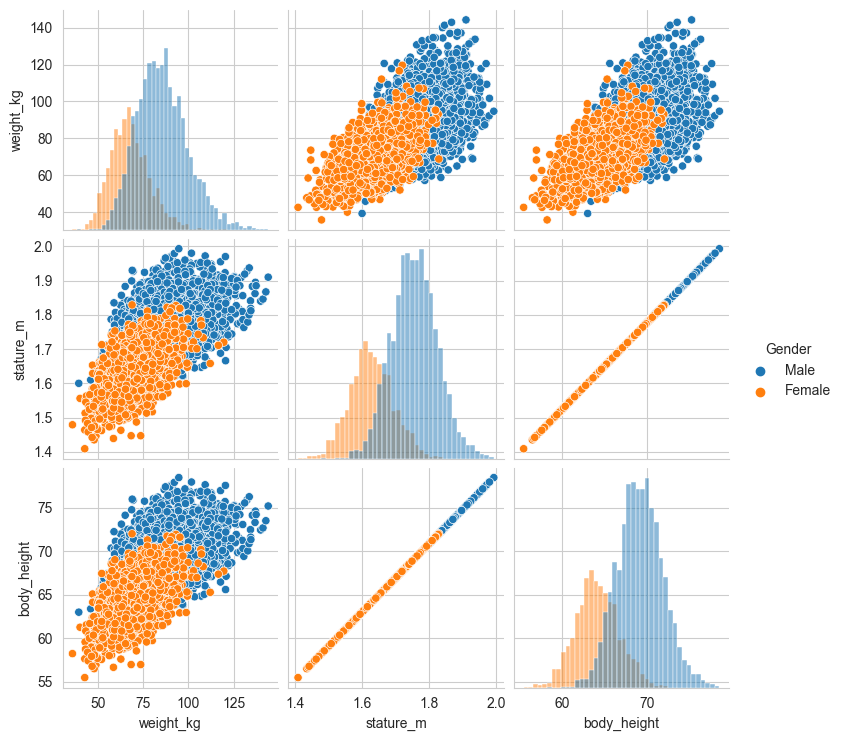

In [6]:
# create pairplot for 'ansur_df_1' to detect redundant features
sns.pairplot(ansur_df_1, hue='Gender', diag_kind='hist')
plt.show()

# two features 'body_height' and 'stature_m' are duplicates, remove one of them.

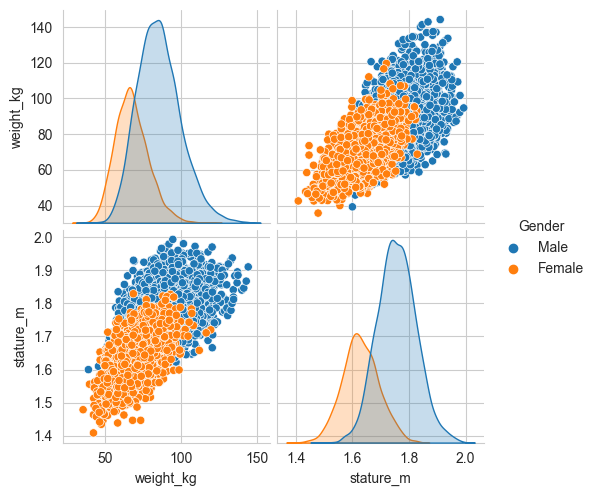

In [7]:
# create pairplot for new dataset after removing column
reduced_df = ansur_df_1.drop('body_height', axis=1)
sns.pairplot(reduced_df, hue='Gender')
plt.show()

# now it looks great!

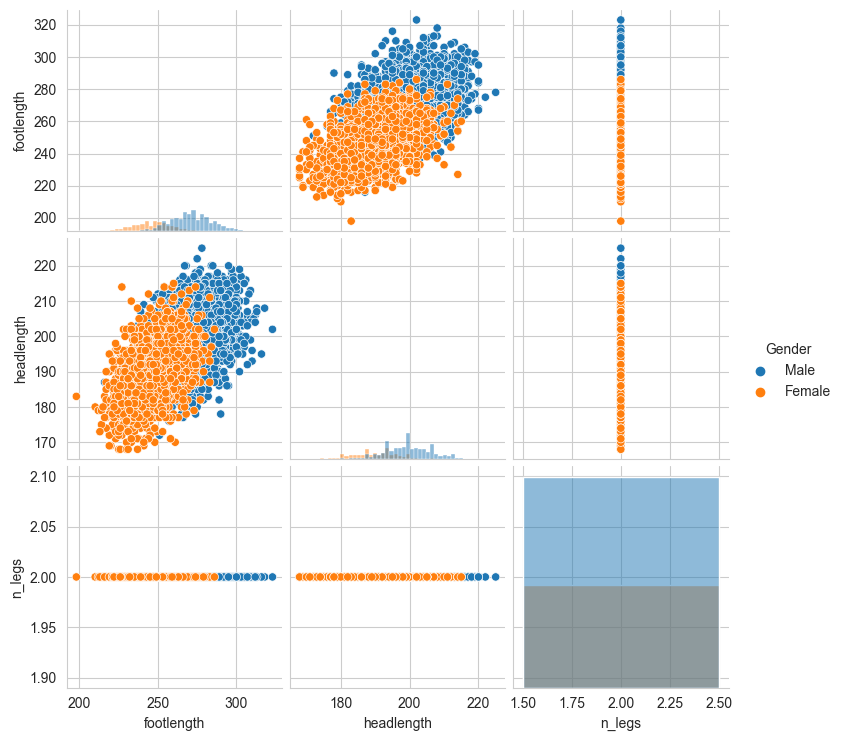

In [8]:
# create pairplot for 'ansur_df_2' to detect redundant features
sns.pairplot(ansur_df_2, hue='Gender', diag_kind='hist')
plt.show()

# variable 'n_legs' has no variance, remove it

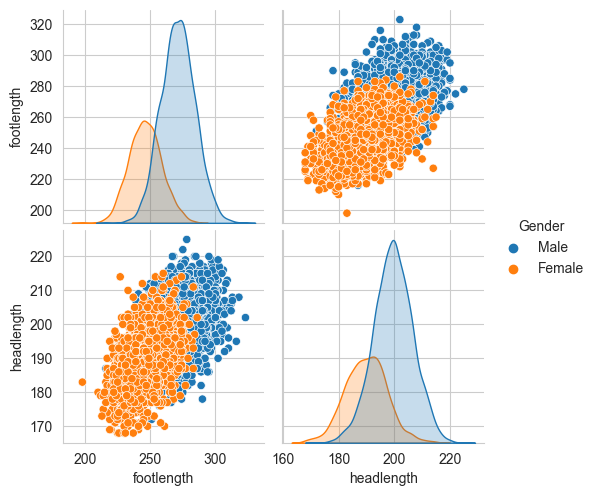

In [9]:
# create pairplot for new dataset after removing column
reduced_df = ansur_df_2.drop('n_legs', axis=1)
sns.pairplot(reduced_df, hue='Gender')
plt.show()

# now it looks great!

#### 1.3 t-SNE visualization of high-dimensional data

* t-SNE full name is **t-Distributed Stochastic Neighbor Embedding**
* It is a powerful technique to visualize high dimensional data using feature extraction

In [10]:
# fitting t-SNE to ANSUR data
import pandas as pd
from sklearn.manifold import TSNE

# get dataset
ansur_df_male = pd.read_csv('7_datasets/ANSUR_male.csv')
ansur_df_female = pd.read_csv('7_datasets/ANSUR_female.csv')
ansur_df = pd.concat([ansur_df_male, ansur_df_female])

# remove non-numerical columns
non_numeric = ['Branch', 'Gender', 'Component', 'BMI_class', 'Height_class']
df_numeric = ansur_df.drop(non_numeric, axis=1)

# create a t-SNE model
m = TSNE(learning_rate=50)
tsne_features = m.fit_transform(df_numeric)
print(tsne_features.shape)

E:\PYTHON\Lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(6068, 2)


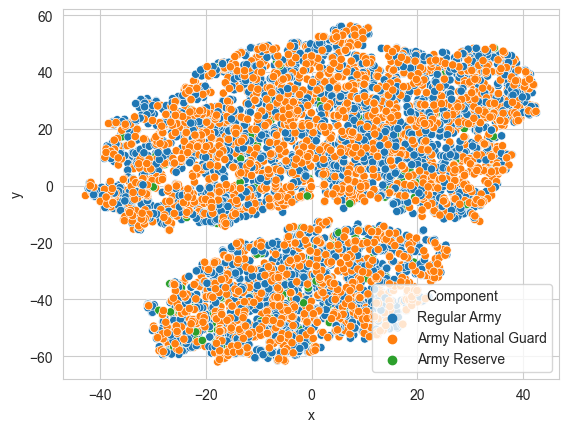

In [11]:
# t-SNE visualization of dimensionality
import seaborn as sns
import matplotlib.pyplot as plt

# add t-SNE features to dataset
ansur_df['x'] = tsne_features[:, 0]
ansur_df['y'] = tsne_features[:, 1]

# make scatterplot with 'Component' as hue
sns.scatterplot(x="x", y="y", hue='Component', data=ansur_df)
plt.show()

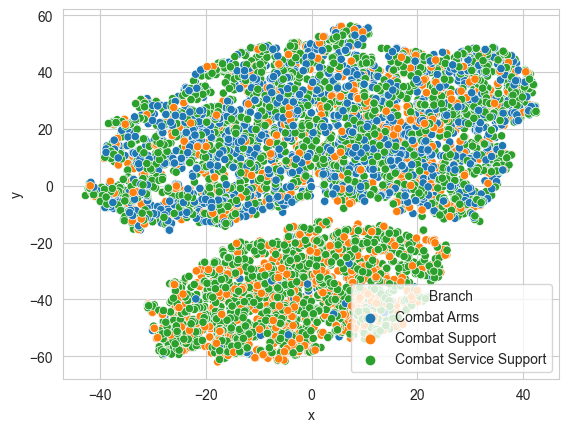

In [12]:
# make scatterplot with 'Branch' as hue
sns.scatterplot(x="x", y="y", hue='Branch', data=ansur_df)
plt.show()

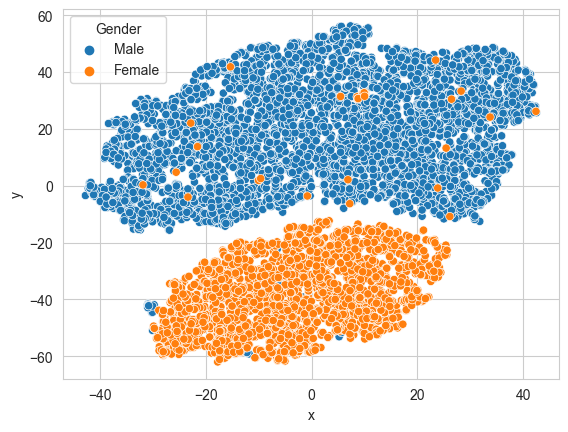

In [13]:
# make scatterplot with 'Gender' as hue
sns.scatterplot(x="x", y="y", hue='Gender', data=ansur_df)
plt.show()

**Conclusion:**

From above plots, we learn that t-SNE found two clusters for male and female. From second plot, we also learn that there are more males in the Combat Arms Branch.

### CHAPTER 2. Feature Selection I - Selecting for Feature Information

#### 2.1 The curse of dimensionality

* Models tend to overfit on high dimensional data
* Number of observations should increase exponentially with the number of features

In [14]:
# train-test split
from sklearn.model_selection import train_test_split
import pandas as pd

# get dataset
ansur_df_male = pd.read_csv('7_datasets/ANSUR_male.csv')
ansur_df_female = pd.read_csv('7_datasets/ANSUR_female.csv')
ansur_df = pd.concat([ansur_df_male, ansur_df_female])
ansur_df = ansur_df.reset_index()

# remove non-numerical columns
non_numeric = ['Branch', 'Component', 'BMI_class', 'Height_class']
ansur_df = ansur_df.drop(non_numeric, axis=1)

# extract X, y
y = ansur_df['Gender']
X = ansur_df.drop('Gender', axis=1)

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("{} rows in test set vs. {} in training set. {} Features".format(X_test.shape[0], X_train.shape[0], X_test.shape[1]))

1821 rows in test set vs. 4247 in training set. 95 Features


In [15]:
# fitting and testing the model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# create model
svc = SVC()
svc.fit(X_train, y_train)

# calculate accuracy scores
accuacy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuacy_train))

# it looks like model over-fits a little on training set

99.3% accuracy on test set vs. 99.1% on training set


In [16]:
# accuracy after dimensionality reduction

# assign with only one column to X
X = ansur_df[['neckcircumferencebase']]
y = ansur_df['Gender']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# create model
svc = SVC()
svc.fit(X_train, y_train)

# calculate accuracy scores
accuacy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuacy_train))

# now the model does not over-fit on training set

92.7% accuracy on test set vs. 93.5% on training set


#### 2.2 Features with missing values or little variance

Variance:
* We can use *VarianceThreshold* method to build a selection tool to filter out features with little variance
* Data should be *normalized* before apply this method

Missing values:
* We can count missing values in dataframe columns with *isna()* and *sum()* method
* We can then apply a missing value threshold to the dataset
* When there are not too many missing values, we can use imputations

C:\Users\User\AppData\Local\Temp\ipykernel_338972\3368719791.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  head_df['n_hairs'] = random_array
C:\Users\User\AppData\Local\Temp\ipykernel_338972\3368719791.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  head_df['measurement_error'] = 0.1


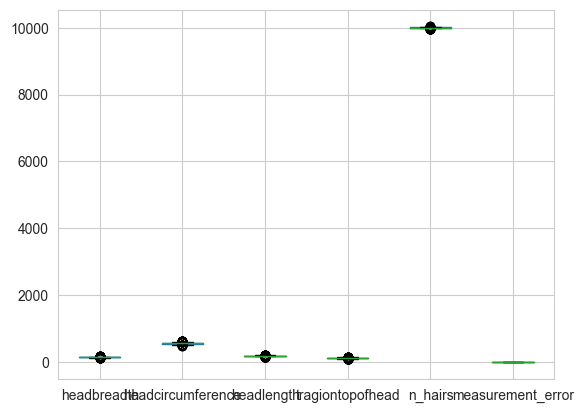

In [17]:
# finding a good variance threshold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# create a head_df with variables only related to head
ansur_df_male = pd.read_csv('7_datasets/ANSUR_male.csv')
ansur_df_female = pd.read_csv('7_datasets/ANSUR_female.csv')
ansur_df = pd.concat([ansur_df_male, ansur_df_female])
ansur_df = ansur_df.reset_index()
cols = ['headbreadth', 'headcircumference', 'headlength', 'tragiontopofhead']
head_df = ansur_df[cols]

# create two more columns with little variance
random_array = np.random.normal(loc=10000.0, scale=10.0, size=head_df.shape[0])
head_df['n_hairs'] = random_array
head_df['measurement_error'] = 0.1

# create the boxplot
head_df.boxplot()
plt.show()

# the plot is not readable, we should normalize the data first

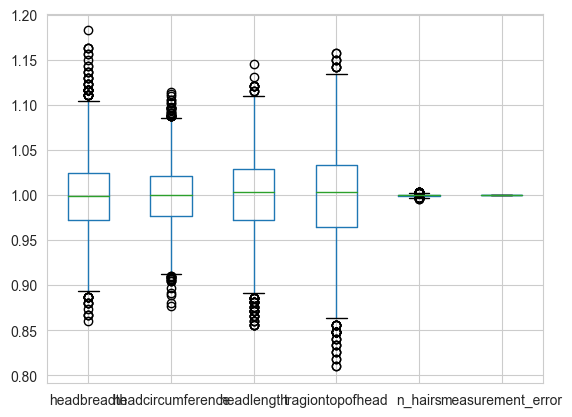

headbreadth          0.001679
headcircumference    0.001030
headlength           0.001868
tragiontopofhead     0.002640
n_hairs              0.000001
measurement_error    0.000000
dtype: float64


In [18]:
# normalize the data and make boxplot again
normalized_head_df = head_df / head_df.mean()
normalized_head_df.boxplot()
plt.show()

# print the variances
print(normalized_head_df.var())

# feature 'n_hairs' and 'measurement_error' has low variance and should be removed

In [19]:
# features with low variance
from sklearn.feature_selection import VarianceThreshold

# create a feature selector
sel = VarianceThreshold(threshold=0.001)
sel.fit(head_df / head_df.mean())
mask = sel.get_support()

# get reduced dataframe
reduced_df = head_df.loc[:, mask]

print("Dimensionality reduced from {} to {}.".format(head_df.shape[1], reduced_df.shape[1]))


Dimensionality reduced from 6 to 4.


In [20]:
# removing features with many missing values
import pandas as pd

# get dataset
school_df = pd.read_csv('7_datasets/Public_Schools2.csv')

# create a mask on whether each feature has less than 50% missing values
mask = school_df.isna().sum() / len(school_df) < 0.5

# get reduced dataframe
reduced_df = school_df.loc[:, mask]

print(school_df.shape)
print(reduced_df.shape)

# 2 features were removed with more than 50% missing values

(131, 21)
(131, 19)


#### 2.3 Pairwise correlation

* For feature selection, the next step is to look at *how features relate to another* to decide if they are worth keeping
* The *pairplot()* method we did earlier can help to visualize strongly correlated variables
* **Correlation coefficient** $r$ can help to quantify the correlation between features, we can calculate it with *corr()* method
* The range of $r$ is $(-1, 1)$
* We can visualize the correlation matrix with *heatmap()* method in 'seaborn' library

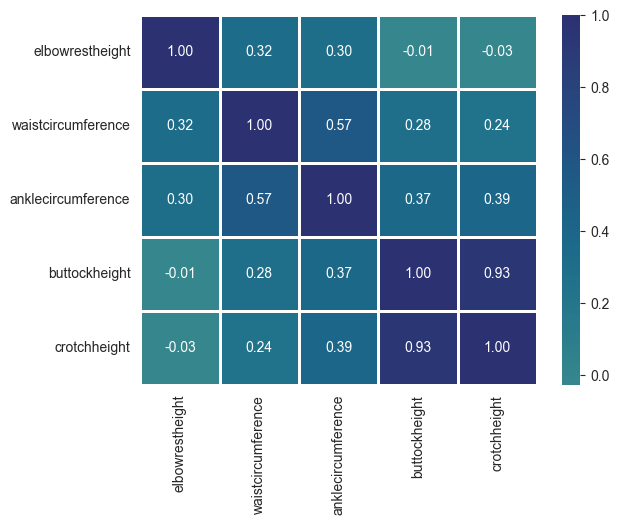

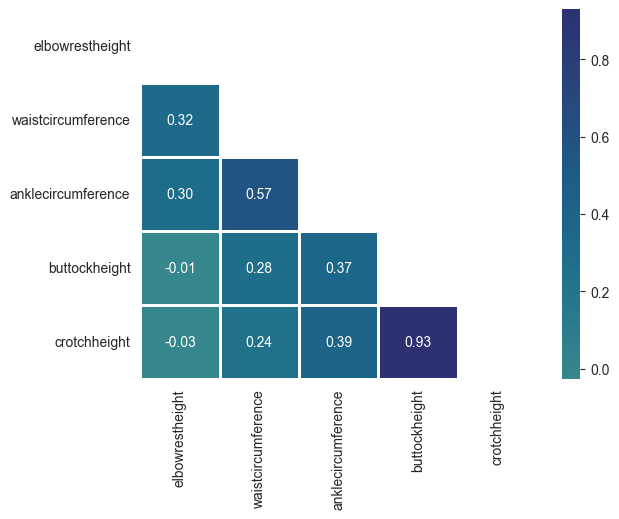

In [25]:
# inspecting correlation matrix
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# get subset dataset
ansur_df_male = pd.read_csv('7_datasets/ANSUR_male.csv')
ansur_df_female = pd.read_csv('7_datasets/ANSUR_female.csv')
ansur_df = pd.concat([ansur_df_male, ansur_df_female])
ansur_df = ansur_df.reset_index()
cols = ['elbowrestheight', 'waistcircumference', 'anklecircumference', 'buttockheight', 'crotchheight']
sub_df = ansur_df[cols]

# get the correlation matrix
corr = sub_df.corr()

# visualize the correlation matrix
sns.heatmap(corr, cmap="crest", center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

# generate a mask for upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# add mask to the heatmap
sns.heatmap(corr, mask=mask, cmap="crest", center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

#### 2.4 Removing highly correlated features

* For features that are highly correlated, we woud like to keep ONLY one of them
* We can remove these values with a **threshold value**
* Be cafeful when non-linear relations or outliers are involved
* Also, make don't causation with features, one does not lead to another

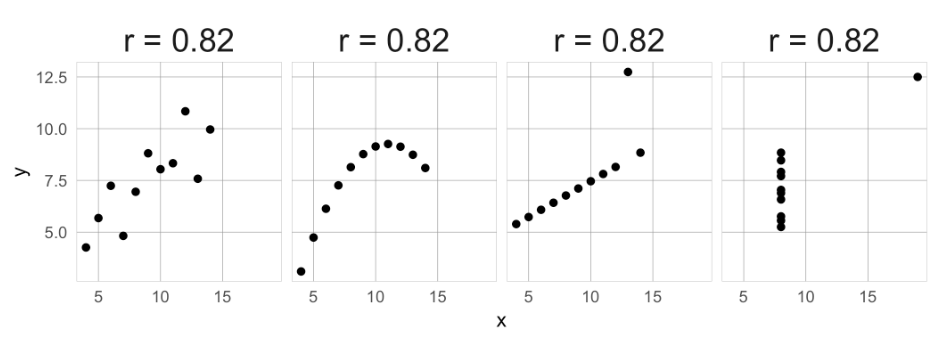

In [28]:
# display plots about misleading correlations
from IPython import display
display.Image("Images/7_correlation_mislead.PNG")

In [29]:
# filtering out highly correlated features
import pandas as pd

# get dataset
ansur_df_male = pd.read_csv('7_datasets/ANSUR_male.csv')

# get correlation
corr_matrix = ansur_df_male.corr().abs()

# make a mask to remove upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# drop highly correlate columns
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.95)]
reduced_df = ansur_df_male.drop(to_drop, axis=1)

print("The original dataframe has {} columns.".format(ansur_df_male.shape[1]))
print("The reduced dataframe has {} columns.".format(reduced_df.shape[1]))


The original dataframe has 99 columns.
The reduced dataframe has 88 columns.


C:\Users\User\AppData\Local\Temp\ipykernel_338972\1955663120.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = ansur_df_male.corr().abs()


In [30]:
# nuclear energy and pool drownings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# make a dataset by hand
pool_drownings = [421, 465, 494, 538, 430, 530, 511, 600, 582, 605, 603]
nuclear_energy = [728.3, 753.9, 768.8, 780.1, 763.7, 788.5, 782.0, 787.2, 806.4, 806.2, 798.9]

weird_df = pd.DataFrame({'pool_drownings': pool_drownings, 'nuclear_energy': nuclear_energy})
print(weird_df.head())

   pool_drownings  nuclear_energy
0             421           728.3
1             465           753.9
2             494           768.8
3             538           780.1
4             430           763.7


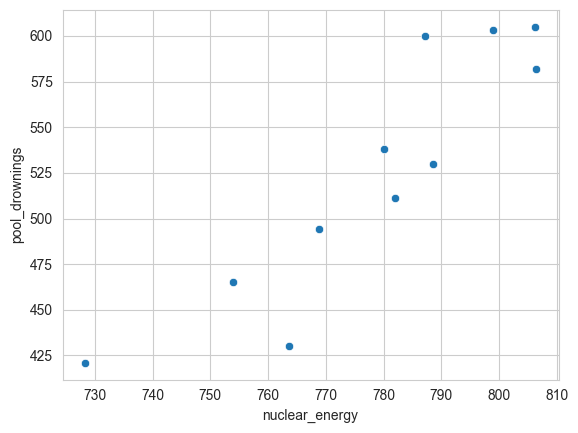

In [31]:
# visualize features
sns.scatterplot(x='nuclear_energy', y='pool_drownings', data=weird_df)
plt.show()

In [32]:
# get correlation matrix
print(weird_df.corr())

                pool_drownings  nuclear_energy
pool_drownings        1.000000        0.901179
nuclear_energy        0.901179        1.000000


Be careful, this correlation does not mean causation!

### CHAPTER 3. Feature Selection II - Selecting for Model Accuracy

#### 3.1 Selecting features for model performance

#### 3.2 Tree-based feature selection

#### 3.3 Regularized linear regression

#### 3.4 Combining feature selectors

### CHAPTER 4. Feature Extraction

#### 4.1 Feature extraction

#### 4.2 Principal component analysis (PCA)

#### 4.3 PCA applications

#### 4.4 Principal Component selection

This is the end of this course!